# IDEB

### Libraries

In [88]:
%matplotlib inline

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.cluster import KMeans

from sklearn.impute import KNNImputer

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import Normalizer 

from sklearn.metrics import silhouette_score as ss

from sklearn_extra.cluster import KMedoids

import scipy.cluster.hierarchy as sch

from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import DBSCAN

import plotly.express as px

import itertools

### EDA

In [2]:
ideb = pd.read_csv("ideb.csv")

In [3]:
ideb.head(1)

,Localidade,Rede,Taxa de Aprovação - 2015,Taxa de Aprovação - 2017,Taxa de Aprovação - 2019,SAEB - 2015,SAEB - 2017,SAEB - 2019,IDEB 2015,IDEB 2017,IDEB 2019,Meta - 2015,Meta - 2017,Meta - 2019,Meta - 2021,Anos,Cod
0,Estado São Paulo,Total,"0,98","0,98","0,98","6,54","6,77","6,83","6,4","6,6","6,7","6,0","6,3","6,5","6,7",1º ao 5º ano,NaN


In [4]:
ideb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4372 entries, 0 to 4371
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Localidade                4372 non-null   object 
 1   Rede                      4372 non-null   object 
 2   Taxa de Aprovação - 2015  2794 non-null   object 
 3   Taxa de Aprovação - 2017  4171 non-null   object 
 4   Taxa de Aprovação - 2019  4123 non-null   object 
 5   SAEB - 2015               2734 non-null   object 
 6   SAEB - 2017               4106 non-null   object 
 7   SAEB - 2019               3918 non-null   object 
 8   IDEB 2015                 2734 non-null   object 
 9   IDEB 2017                 4106 non-null   object 
 10  IDEB 2019                 3918 non-null   object 
 11  Meta - 2015               2986 non-null   object 
 12  Meta - 2017               2991 non-null   object 
 13  Meta - 2019               4298 non-null   object 
 14  Meta - 2

In [5]:
ideb.isnull().sum()

Localidade                     0
Rede                           0
Taxa de Aprovação - 2015    1578
Taxa de Aprovação - 2017     201
Taxa de Aprovação - 2019     249
SAEB - 2015                 1638
SAEB - 2017                  266
SAEB - 2019                  454
IDEB 2015                   1638
IDEB 2017                    266
IDEB 2019                    454
Meta - 2015                 1386
Meta - 2017                 1381
Meta - 2019                   74
Meta - 2021                   40
Anos                           0
Cod                           11
dtype: int64

In [6]:
miss_vals = ["na"]

In [7]:
ideb = pd.read_csv("ideb.csv", na_values = miss_vals)

In [8]:
ideb.head(3)

,Localidade,Rede,Taxa de Aprovação - 2015,Taxa de Aprovação - 2017,Taxa de Aprovação - 2019,SAEB - 2015,SAEB - 2017,SAEB - 2019,IDEB 2015,IDEB 2017,IDEB 2019,Meta - 2015,Meta - 2017,Meta - 2019,Meta - 2021,Anos,Cod
0,Estado São Paulo,Total,"0,98","0,98","0,98","6,54","6,77","6,83","6,4","6,6","6,7","6,0","6,3","6,5","6,7",1º ao 5º ano,NaN
1,Estado São Paulo,Pública,"0,97","0,98","0,98","6,38","6,60","6,62","6,2","6,5","6,5","5,8","6,1","6,3","6,6",1º ao 5º ano,NaN
2,Estado São Paulo,Privada,"0,99","0,99","0,99","7,22","7,51","7,67","7,1","7,4","7,6","7,5","7,6","7,8","7,9",1º ao 5º ano,NaN


In [9]:
ideb = ideb.applymap(lambda x: x.replace(",", ".") if isinstance(x, str) else x)

/var/folders/0_/23jph36d0154h_0z_b1ppjfw0000gn/T/ipykernel_2388/3669425328.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ideb = ideb.applymap(lambda x: x.replace(",", ".") if isinstance(x, str) else x)


In [10]:
ideb["Rede"].unique()

array(['Total', 'Pública', 'Privada', 'Estadual', 'Municipal', 'Federal'],
      dtype=object)

In [11]:
ideb["Rede"].value_counts()

Rede
Pública      1937
Estadual     1471
Municipal     927
Federal        31
Total           3
Privada         3
Name: count, dtype: int64

In [12]:
ideb.isnull().sum()

Localidade                     0
Rede                           0
Taxa de Aprovação - 2015    1578
Taxa de Aprovação - 2017     201
Taxa de Aprovação - 2019     249
SAEB - 2015                 1638
SAEB - 2017                  266
SAEB - 2019                  454
IDEB 2015                   1638
IDEB 2017                    266
IDEB 2019                    454
Meta - 2015                 1386
Meta - 2017                 1381
Meta - 2019                   74
Meta - 2021                   40
Anos                           0
Cod                           11
dtype: int64

In [13]:
ideb["rede_b"] = ideb["Rede"].map(lambda x: 0 if x == "Estadual" else (1 if x == "Municipal" else 2))

In [14]:
ideb["rede_b"].unique()

array([2, 0, 1])

In [15]:
ideb["rede_b"].value_counts()

rede_b
2    1974
0    1471
1     927
Name: count, dtype: int64

ideb_17 = ideb[["rede_b", "IDEB 2017"]]

### Filtering Dataset

I am going to use data from 2017 which is the year with the least amount of missing values.

In [16]:
ideb_17 = ideb.loc[ideb["rede_b"] != 2, ["rede_b", "IDEB 2017", 
                                        "Taxa de Aprovação - 2017",
                                        "SAEB - 2017"]]

In [17]:
ideb_17.head(3)

,rede_b,IDEB 2017,Taxa de Aprovação - 2017,SAEB - 2017
3,0,6.5,0.99,6.63
7,0,4.8,0.94,5.17
11,1,6.9,0.99,6.94


In [18]:
ideb_17.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2398 entries, 3 to 4370
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   rede_b                    2398 non-null   int64 
 1   IDEB 2017                 2158 non-null   object
 2   Taxa de Aprovação - 2017  2216 non-null   object
 3   SAEB - 2017               2158 non-null   object
dtypes: int64(1), object(3)
memory usage: 93.7+ KB


In [19]:
ideb_17["rede_b"].value_counts()

rede_b
0    1471
1     927
Name: count, dtype: int64

In [20]:
ideb_17.isnull().sum()

rede_b                        0
IDEB 2017                   240
Taxa de Aprovação - 2017    182
SAEB - 2017                 240
dtype: int64

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='IDEB 2017', ylabel='Count'>

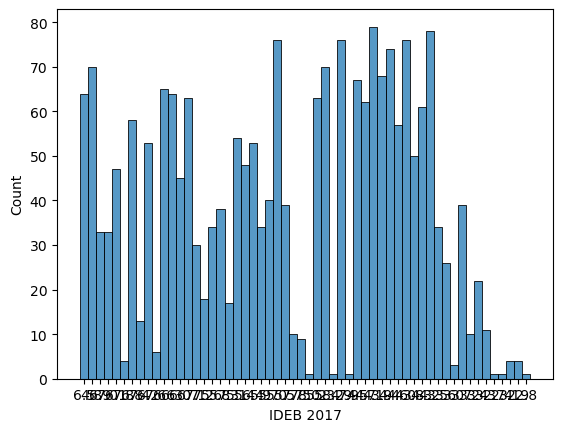

In [21]:
sns.histplot(data = ideb_17, x = "IDEB 2017")

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Taxa de Aprovação - 2017', ylabel='Count'>

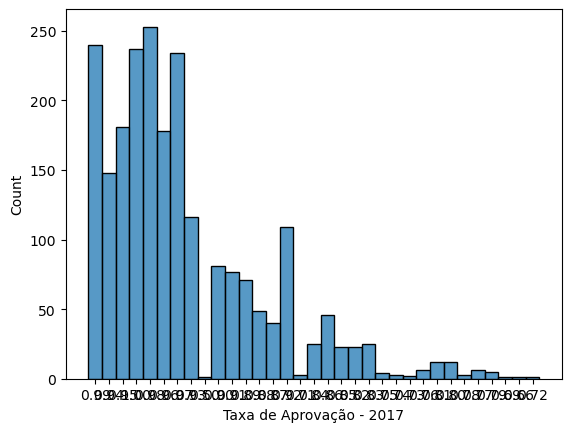

In [22]:
sns.histplot(data = ideb_17, x = "Taxa de Aprovação - 2017")

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SAEB - 2017', ylabel='Count'>

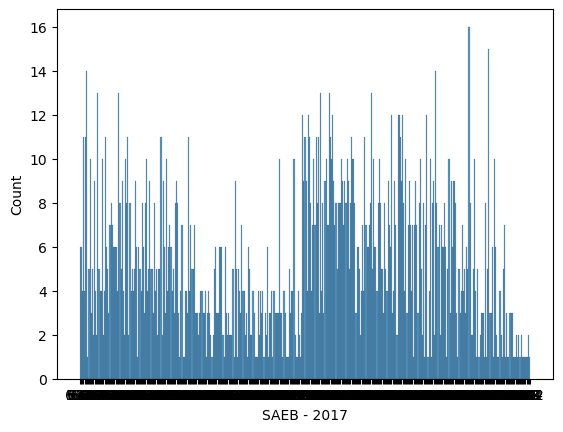

In [23]:
sns.histplot(data = ideb_17, x = "SAEB - 2017")

### Splitting the Dataset

y = ideb_17["rede_b"].values

X = ideb_17.iloc[:, [1, 2, 3]].values

### Missing Values

The imputation using the median was the first option considered due to its simplicity and for being less sensitive to outliers than the other summary statistics (Kumar, 2021). However, the dataset has a complexity that requires a more sophisticated approach. The KNN Imputer was chosen for the following reasons (Firdose):
- capturing relationships between variables;
- preserving the structure and patterns present in the data;
- and for its non-parametric approach which does not make assumptions about the data distribution.

The trade-off will be the computational complexity and the sensitive to outliers. The second one will be dealt with the l2 Normalisation (Htoon, 2020).

In [24]:
ideb_17.head(1)

,rede_b,IDEB 2017,Taxa de Aprovação - 2017,SAEB - 2017
3,0,6.5,0.99,6.63


In [25]:
imputer = KNNImputer(n_neighbors = 5)
ideb_17 = imputer.fit_transform(ideb_17)

In [26]:
ideb_17

array([[0.  , 6.5 , 0.99, 6.63],
       [0.  , 4.8 , 0.94, 5.17],
       [1.  , 6.9 , 0.99, 6.94],
       ...,
       [0.  , 4.3 , 0.95, 4.49],
       [0.  , 3.2 , 0.88, 3.62],
       [0.  , 4.3 , 0.96, 4.47]])

In [27]:
ideb_17 = pd.DataFrame(ideb_17)

In [28]:
ideb_17.tail()

,0,1,2,3
2393,0.0,4.2,0.92,4.57
2394,0.0,4.0,0.89,4.48
2395,0.0,4.3,0.95,4.49
2396,0.0,3.2,0.88,3.62
2397,0.0,4.3,0.96,4.47


In [29]:
ideb_17.columns = ["Rede", "IDEB", "Tx Aprovacao", "SAEB"]

In [30]:
ideb_17.tail()

,Rede,IDEB,Tx Aprovacao,SAEB
2393,0.0,4.2,0.92,4.57
2394,0.0,4.0,0.89,4.48
2395,0.0,4.3,0.95,4.49
2396,0.0,3.2,0.88,3.62
2397,0.0,4.3,0.96,4.47


### Standardise

In [31]:
scaler = StandardScaler()

In [32]:
ideb_17[["Rede_T", "IDEB_T", "Tx Aprovacao_T", "SAEB_T" ]] = scaler.fit_transform(
ideb_17[["Rede", "IDEB", "Tx Aprovacao", "SAEB" ]])

In [33]:
ideb_17.tail()

,Rede,IDEB,Tx Aprovacao,SAEB,Rede_T,IDEB_T,Tx Aprovacao_T,SAEB_T
2393,0.0,4.2,0.92,4.57,-0.793841,-0.947061,-0.464858,-0.986114
2394,0.0,4.0,0.89,4.48,-0.793841,-1.131899,-1.053726,-1.079466
2395,0.0,4.3,0.95,4.49,-0.793841,-0.854641,0.124011,-1.069093
2396,0.0,3.2,0.88,3.62,-0.793841,-1.871251,-1.250016,-1.971495
2397,0.0,4.3,0.96,4.47,-0.793841,-0.854641,0.320301,-1.089838


# K-means Clustering

Citation: https://www.youtube.com/watch?v=iNlZ3IU5Ffw

### Elbow Plot

In [34]:
def optimise (data, max_k):
    means = []
    inertia = []
    
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters = k, n_init = 10)
        kmeans.fit(data)
        
        means.append(k)
        inertia.append(kmeans.inertia_)
        
    fig = plt.subplots(figsize = (12, 6))
    plt.plot(means, inertia, "*-")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    plt.grid(True)
    plt.show()
    

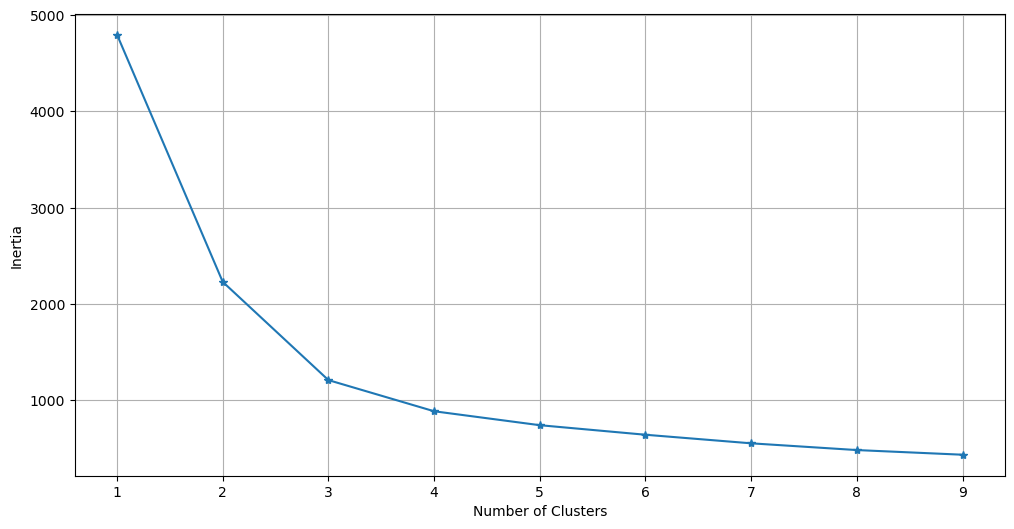

In [35]:
optimise(ideb_17[["IDEB_T", "Tx Aprovacao_T"]], 10)

### Applying K-Means

In [36]:
kmeans = KMeans(n_clusters = 2)

In [37]:
kmeans.fit(ideb_17[["IDEB_T", "Tx Aprovacao_T"]])

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [38]:
ideb_17["kmeans_2"] = kmeans.labels_

In [39]:
ideb_17.tail()

,Rede,IDEB,Tx Aprovacao,SAEB,Rede_T,IDEB_T,Tx Aprovacao_T,SAEB_T,kmeans_2
2393,0.0,4.2,0.92,4.57,-0.793841,-0.947061,-0.464858,-0.986114,0
2394,0.0,4.0,0.89,4.48,-0.793841,-1.131899,-1.053726,-1.079466,0
2395,0.0,4.3,0.95,4.49,-0.793841,-0.854641,0.124011,-1.069093,0
2396,0.0,3.2,0.88,3.62,-0.793841,-1.871251,-1.250016,-1.971495,0
2397,0.0,4.3,0.96,4.47,-0.793841,-0.854641,0.320301,-1.089838,0


In [40]:
ideb_17.describe()

,Rede,IDEB,Tx Aprovacao,SAEB,Rede_T,IDEB_T,Tx Aprovacao_T,SAEB_T,kmeans_2
count,2398.000000,2398.000000,2398.000000,2398.000000,2398.000000,2.398000e+03,2.398000e+03,2.398000e+03,2398.000000
mean,0.386572,5.224746,0.943682,5.520706,0.000000,-4.740902e-16,1.256339e-15,-2.844541e-16,0.499583
std,0.487066,1.082253,0.050956,0.964295,1.000209,1.000209e+00,1.000209e+00,1.000209e+00,0.500104
min,0.000000,2.400000,0.500000,3.320000,-0.793841,-2.610604e+00,-8.709020e+00,-2.282668e+00,0.000000
25%,0.000000,4.400000,0.920000,4.752500,-0.793841,-7.622224e-01,-4.648576e-01,-7.968168e-01,0.000000
50%,0.000000,5.000000,0.950000,5.270000,-0.793841,-2.077079e-01,1.240111e-01,-2.600435e-01,0.000000
75%,1.000000,6.200000,0.980000,6.370000,1.259698,9.013212e-01,7.128799e-01,8.809239e-01,1.000000
max,1.000000,8.200000,1.000000,8.170000,1.259698,2.749703e+00,1.105459e+00,2.747962e+00,1.000000


### Plotting the Results

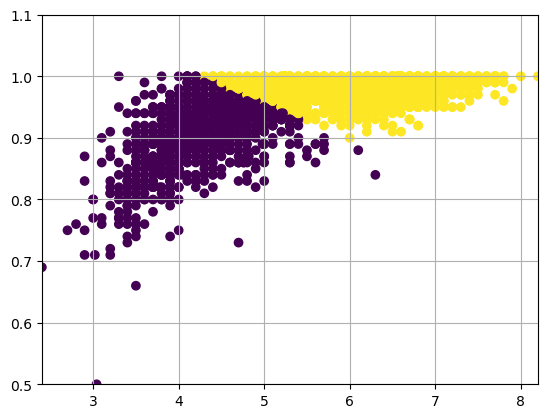

In [41]:
plt.scatter(x = ideb_17["IDEB"], y = ideb_17["Tx Aprovacao"], 
           c = ideb_17["kmeans_2"])
plt.xlim(2.4 , 8.2)
plt.ylim(0.5, 1.1)
plt.grid(True)
plt.show()

In [42]:
silhouette_avg = silhouette_score(ideb_17[["IDEB_T", "Tx Aprovacao_T"]], kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.46733590581252


### IDEB and Tx de Aprovacao

In [43]:
for k in range(1, 4):
    kmeans = KMeans(n_clusters = k, n_init = 10)
    kmeans.fit(ideb_17[["IDEB_T", "Tx Aprovacao_T"]])
    ideb_17[f'KMeans{k}'] = kmeans.labels_

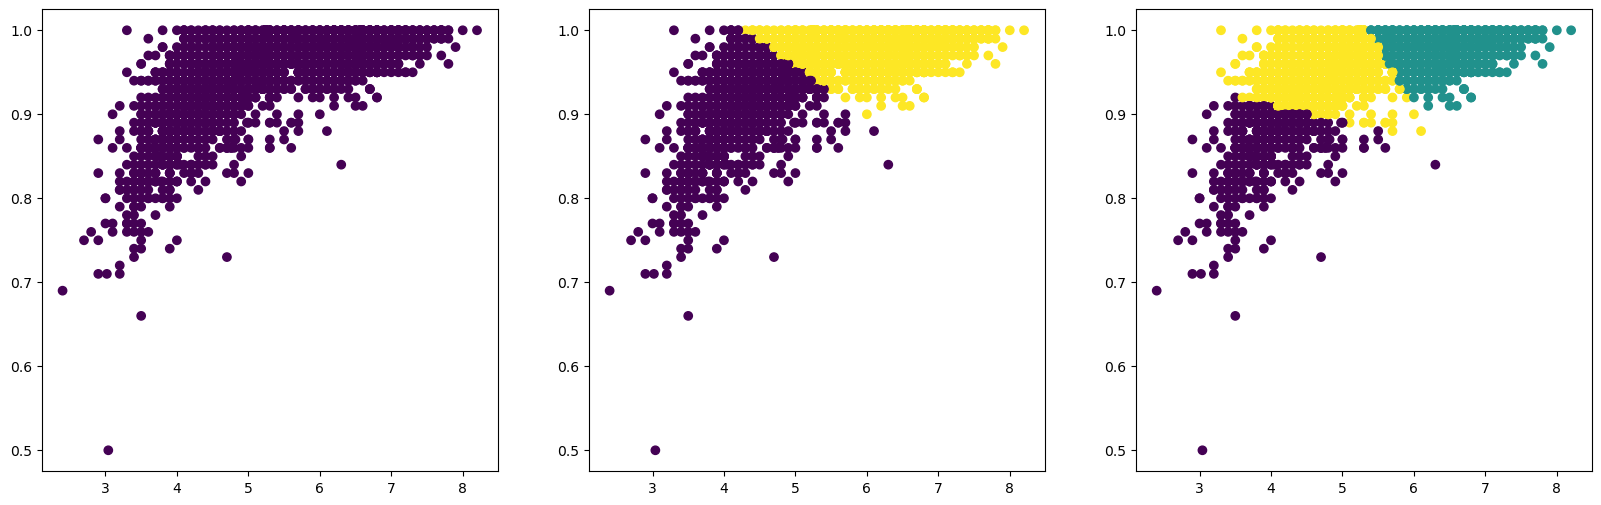

In [44]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 6))

for i, ax in enumerate(fig.axes, start = 1):
    ax.scatter(x = ideb_17["IDEB"], y = ideb_17["Tx Aprovacao"], 
              c = ideb_17[f'KMeans{i}'])

### SAEB and Tx de Aprovacao

In [45]:
for k in range(1, 4):
    kmeans = KMeans(n_clusters = k, n_init = 10)
    kmeans.fit(ideb_17[["SAEB_T", "Tx Aprovacao_T"]])
    ideb_17[f'KMeans{k}'] = kmeans.labels_

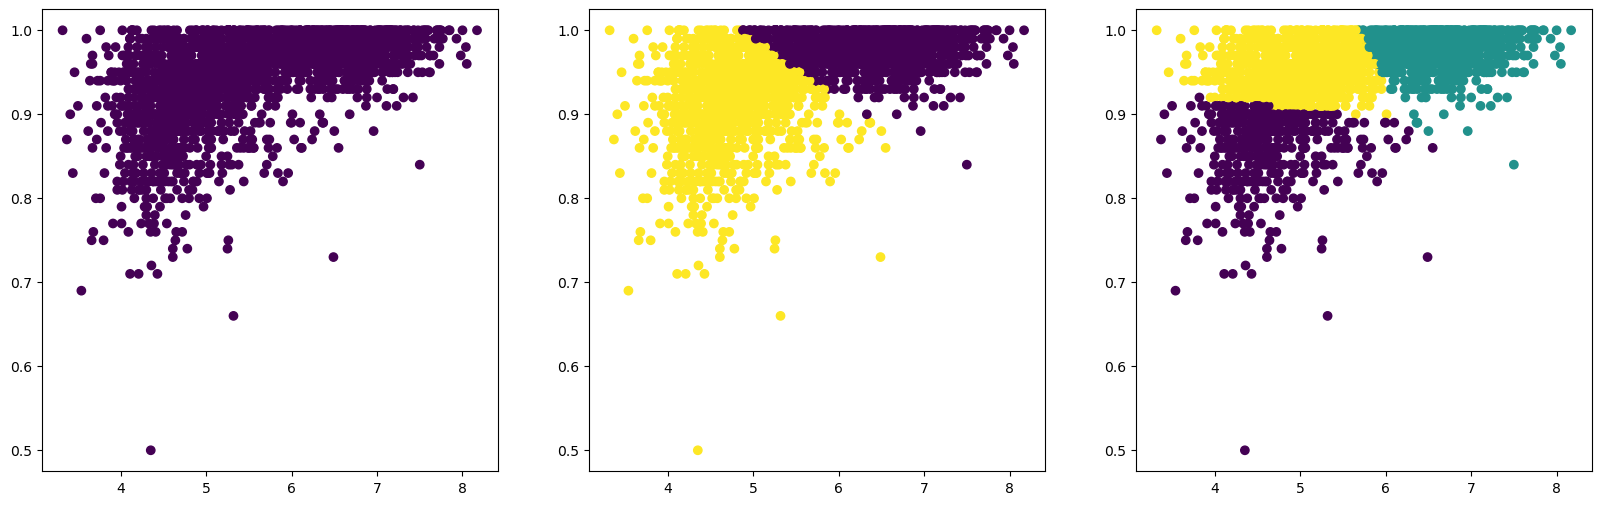

In [46]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 6))

for i, ax in enumerate(fig.axes, start = 1):
    ax.scatter(x = ideb_17["SAEB"], y = ideb_17["Tx Aprovacao"], 
              c = ideb_17[f'KMeans{i}'])

### IDEB and SAEB

In [47]:
for k in range(1, 4):
    kmeans = KMeans(n_clusters = k, n_init = 10)
    kmeans.fit(ideb_17[["IDEB_T", "SAEB_T"]])
    ideb_17[f'KMeans{k}'] = kmeans.labels_

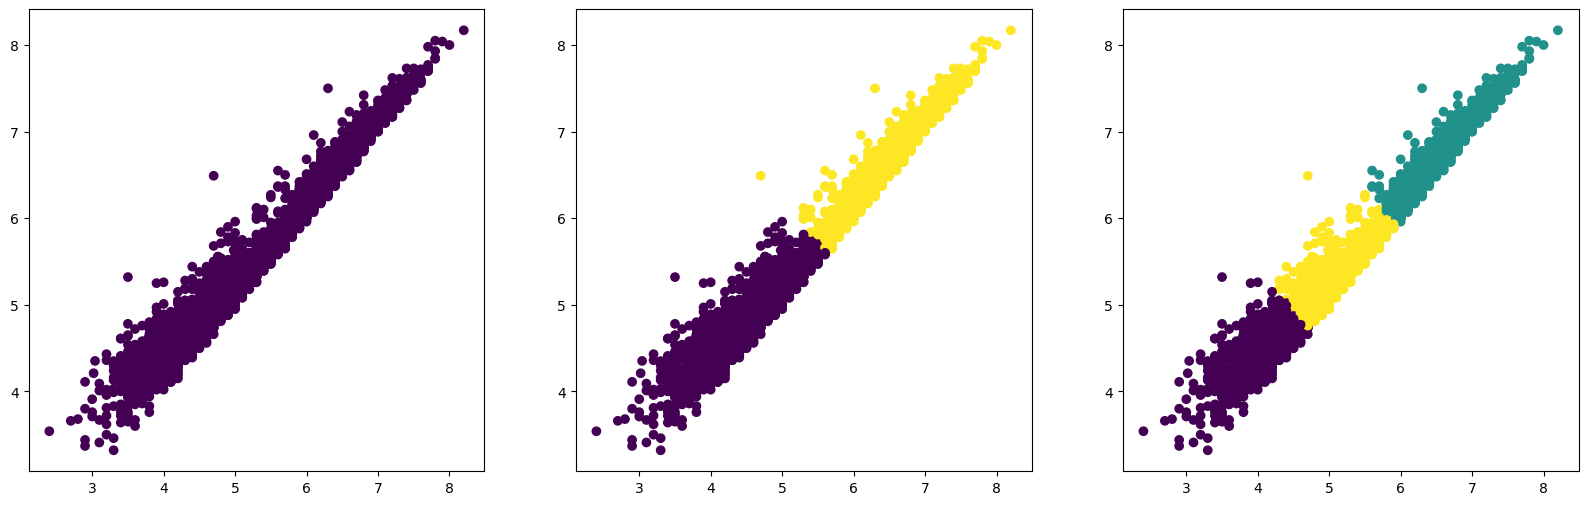

In [48]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 6))

for i, ax in enumerate(fig.axes, start = 1):
    ax.scatter(x = ideb_17["IDEB"], y = ideb_17["SAEB"], 
              c = ideb_17[f'KMeans{i}'])

In [49]:
silhouette_avg = silhouette_score(ideb_17[["IDEB_T", "SAEB_T"]], kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5832664438325722


# K Medoids

https://www.youtube.com/watch?v=8PSbi6GKXrs

In [50]:
#! pip install scikit-learn-extra

kmedoids = KMedoids(n_clusters = 2, random_state = 12)
kmedoids.fit(ideb_17[["IDEB_T", "Tx Aprovacao_T"]])

km_labels = kmedoids.labels_

medoids = kmedoids.medoid_indices_

print("Cluster Labels:", km_labels)
print("Cluster Medoids:", medoids)

In [51]:
kmedoids = KMedoids(n_clusters = 4, random_state = 12)
kmedoids.fit(ideb_17[["SAEB_T", "Tx Aprovacao_T"]])

km_labels = kmedoids.labels_

medoids = kmedoids.medoid_indices_

print("Cluster Labels:", km_labels)
print("Cluster Medoids:", medoids)


/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(


Cluster Labels: [3 0 3 ... 0 2 0]
Cluster Medoids: [  11   34 2071  356]


In [52]:
ideb_17["KMedoids"] = km_labels

In [53]:
ideb_17["KMedoids"].value_counts()

KMedoids
0    769
3    654
2    603
1    372
Name: count, dtype: int64

In [54]:
ideb_17.groupby("KMedoids").median()

,Rede,IDEB,Tx Aprovacao,SAEB,Rede_T,IDEB_T,Tx Aprovacao_T,SAEB_T,kmeans_2,KMeans1,KMeans2,KMeans3
KMedoids,,,,,,,,,,,,
0,0.0,4.82,0.95,5.200,-0.793841,-0.374062,0.124011,-0.332651,0.0,0.0,0.0,2.0
1,0.0,5.60,0.98,5.700,-0.793841,0.346807,0.712880,0.185971,1.0,0.0,1.0,2.0
2,0.0,4.00,0.89,4.540,-0.793841,-1.131899,-1.053726,-1.017231,0.0,0.0,0.0,0.0
3,1.0,6.60,0.98,6.765,1.259698,1.270998,0.712880,1.290635,1.0,0.0,1.0,1.0


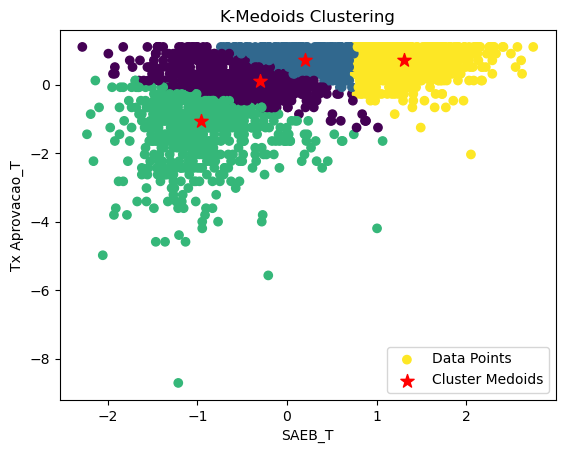

In [55]:
def assign_labels(data, medoid_indices):
    labels = np.zeros(len(data))
    for i, point in enumerate(data):
        labels[i] = np.argmin(np.linalg.norm(point - data[medoid_indices], axis = 1))
    return labels.astype(int)

km_labels = assign_labels(ideb_17[["SAEB_T", "Tx Aprovacao_T"]].values, medoids)

plt.scatter(ideb_17["SAEB_T"], ideb_17["Tx Aprovacao_T"], c = km_labels, cmap = 'viridis', 
            label = 'Data Points')

plt.scatter(ideb_17["SAEB_T"].iloc[medoids], ideb_17["Tx Aprovacao_T"].iloc[medoids], 
            marker = "*", s = 100, c = 'red', label = 'Cluster Medoids')

plt.title('K-Medoids Clustering')
plt.xlabel('SAEB_T')
plt.ylabel('Tx Aprovacao_T')
plt.legend()
plt.show()

# Hierarchical Agglomerative

https://www.youtube.com/watch?v=lQt92mh0N8I

### IDEB X SAEB

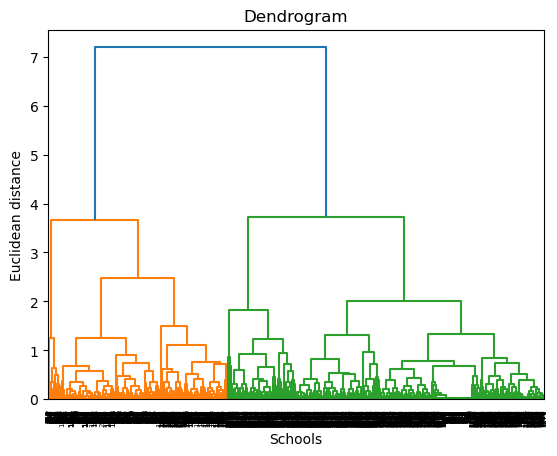

In [56]:
dendrogrm = sch.dendrogram(sch.linkage(ideb_17[["IDEB_T", "SAEB_T"]], method = 'complete'))
plt.title('Dendrogram')
plt.xlabel("Schools")
plt.ylabel('Euclidean distance')
plt.show()

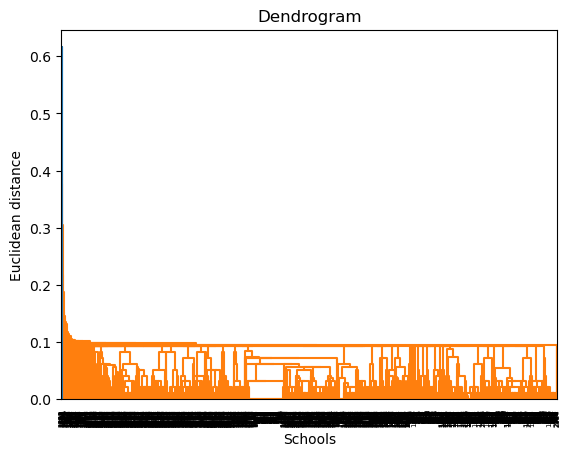

In [57]:
dendrogrm = sch.dendrogram(sch.linkage(ideb_17[["IDEB_T", "SAEB_T"]], method = "single"))
plt.title('Dendrogram')
plt.xlabel("Schools")
plt.ylabel('Euclidean distance')
plt.show()

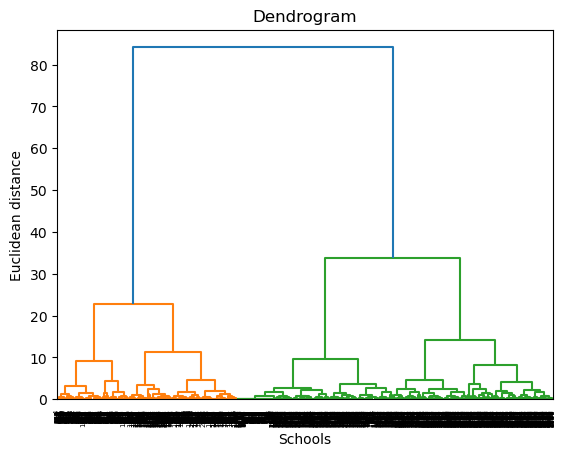

In [58]:
dendrogrm = sch.dendrogram(sch.linkage(ideb_17[["IDEB_T", "SAEB_T"]], method = "ward"))
plt.title('Dendrogram')
plt.xlabel("Schools")
plt.ylabel('Euclidean distance')
plt.show()

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


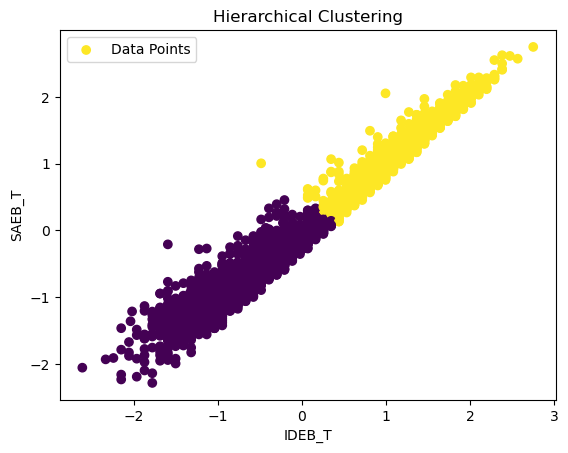

In [59]:
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
hc.fit(ideb_17[["IDEB_T", "SAEB_T"]])

cluster_labels = hc.labels_

plt.scatter(ideb_17["IDEB_T"], ideb_17["SAEB_T"], c=cluster_labels, cmap='viridis', label='Data Points')

plt.title('Hierarchical Clustering')
plt.xlabel('IDEB_T')
plt.ylabel('SAEB_T')
plt.legend()
plt.show()


### IDEB X TX Aprovacao

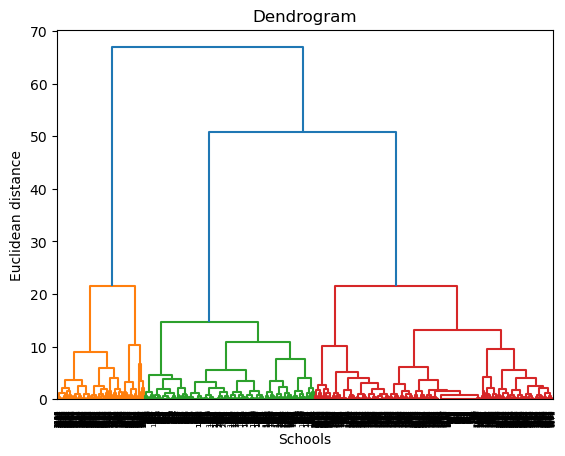

In [60]:
dendrogrm = sch.dendrogram(sch.linkage(ideb_17[["IDEB_T", "Tx Aprovacao_T"]], method = "ward"))
plt.title('Dendrogram')
plt.xlabel("Schools")
plt.ylabel('Euclidean distance')
plt.show()

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


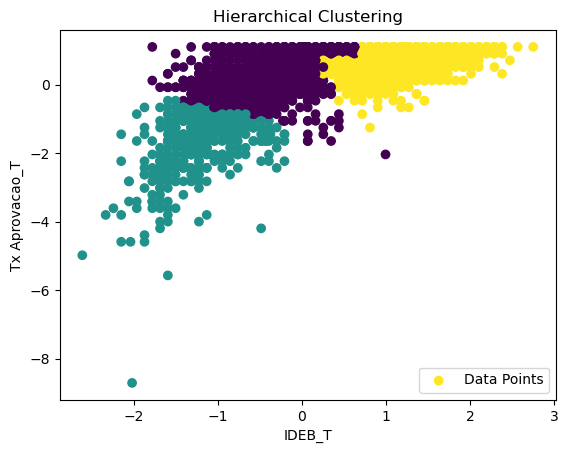

In [61]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
hc.fit(ideb_17[["IDEB_T", "Tx Aprovacao_T"]])

cluster_labels = hc.labels_

plt.scatter(ideb_17["IDEB_T"], ideb_17["Tx Aprovacao_T"], 
            c = cluster_labels, cmap = 'viridis', label = 'Data Points')

plt.title('Hierarchical Clustering')
plt.xlabel("IDEB_T")
plt.ylabel("Tx Aprovacao_T")
plt.legend()
plt.show()

### SAEB X TX Aprovacao

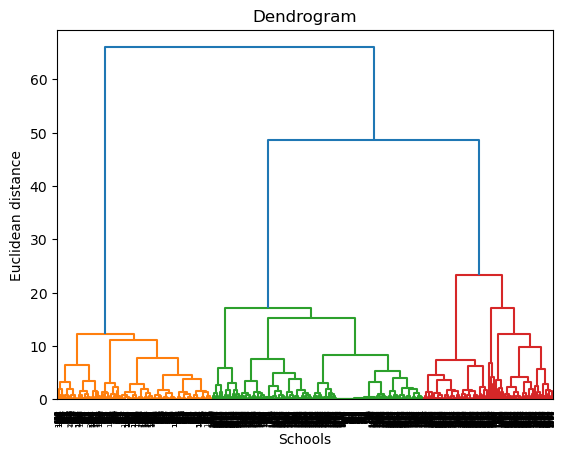

In [62]:
dendrogrm = sch.dendrogram(sch.linkage(ideb_17[["SAEB_T", "Tx Aprovacao_T"]], method = "ward"))
plt.title('Dendrogram')
plt.xlabel("Schools")
plt.ylabel('Euclidean distance')
plt.show()

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


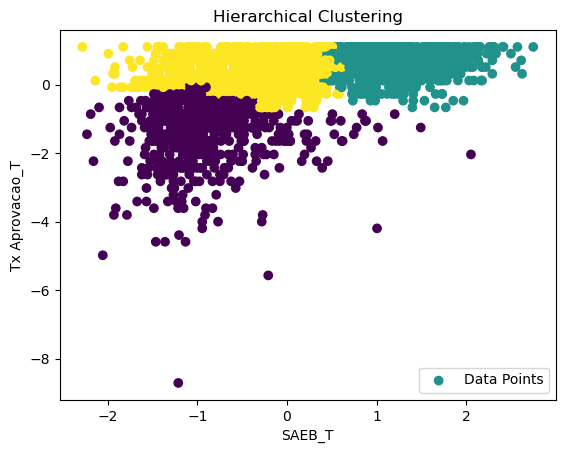

In [63]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
hc.fit(ideb_17[["SAEB_T", "Tx Aprovacao_T"]])

cluster_labels = hc.labels_

plt.scatter(ideb_17["SAEB_T"], ideb_17["Tx Aprovacao_T"], 
            c = cluster_labels, cmap = 'viridis', label = 'Data Points')

plt.title('Hierarchical Clustering')
plt.xlabel("SAEB_T")
plt.ylabel("Tx Aprovacao_T")
plt.legend()
plt.show()

# DBSCAN

In [64]:


# Create the DBSCAN object
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the DBSCAN model to your data
dbscan.fit(ideb_17[["Tx Aprovacao_T", "SAEB_T"]])

# Get the cluster labels
cluster_labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_noise_ = list(cluster_labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)


Estimated number of clusters: 1
Estimated number of noise points: 6


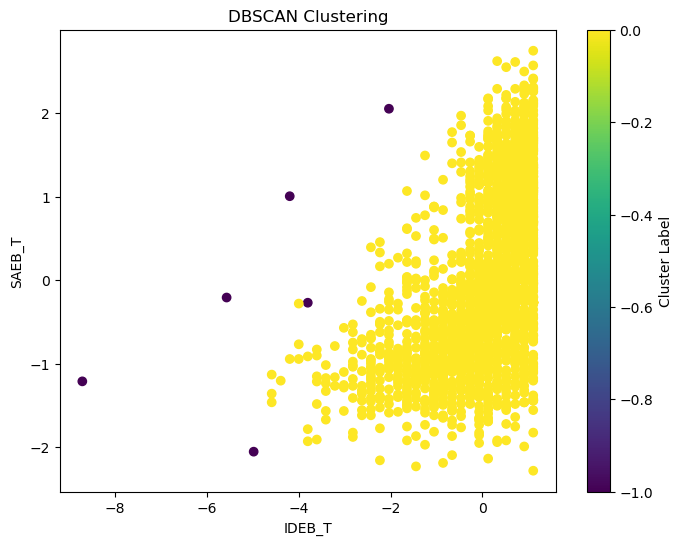

In [65]:
import matplotlib.pyplot as plt

# Extract coordinates of the clusters
x = ideb_17["Tx Aprovacao_T"]
y = ideb_17["SAEB_T"]

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=cluster_labels, cmap='viridis')
plt.xlabel('IDEB_T')
plt.ylabel('SAEB_T')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster Label')
plt.show()


https://www.youtube.com/watch?v=VO_uzCU_nKw

https://colab.research.google.com/drive/1DphvjpgQXwBWQq08dMyoSc6UREzXLxSE?usp=sharing#scrollTo=ibVVoe4cSR1h

In [66]:
X = ideb_17[["Tx Aprovacao_T", "SAEB_T"]]
print(X)

      Tx Aprovacao_T    SAEB_T
0           0.909170  1.150607
1          -0.072278 -0.363768
2           0.909170  1.472153
3           0.124011  1.378801
4           1.105459  1.544760
...              ...       ...
2393       -0.464858 -0.986114
2394       -1.053726 -1.079466
2395        0.124011 -1.069093
2396       -1.250016 -1.971495
2397        0.320301 -1.089838

[2398 rows x 2 columns]


In [95]:
dbscan_cluster_model = DBSCAN().fit(X)
dbscan_cluster_model

DBSCAN()

In [96]:
dbscan_cluster_model.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [97]:
ideb_17["dbscan"] = dbscan_cluster_model.labels_

In [98]:
ideb_17.tail(1)

,Rede,IDEB,Tx Aprovacao,SAEB,Rede_T,IDEB_T,Tx Aprovacao_T,SAEB_T,kmeans_2,KMeans1,KMeans2,KMeans3,KMedoids,dbscan
2397,0.0,4.3,0.96,4.47,-0.793841,-0.854641,0.320301,-1.089838,0,0,0,0,0,0


In [99]:
ideb_17["dbscan"].value_counts()

dbscan
 0    2392
-1       6
Name: count, dtype: int64

So, my model only has one cluster and the -1 is all the noise, the outliers

In [100]:
fig = px.scatter(x = ideb_17["Tx Aprovacao_T"], y = ideb_17["SAEB_T"], 
                color = ideb_17["dbscan"])

fig.show()

In [103]:
fig = px.scatter(x = ideb_17["Tx Aprovacao_T"], y = ideb_17["IDEB_T"], 
                color = ideb_17["dbscan"])

fig.show()

In [104]:
fig = px.scatter(x = ideb_17["SAEB_T"], y = ideb_17["IDEB_T"], 
                color = ideb_17["dbscan"])

fig.show()

the yellows dots are one cluster and the blue ones are the noise

In [101]:
ss(X, ideb_17["dbscan"])

0.6608140944936272

In [85]:
epsilons = np.linspace(0.01, 1, num = 15)

min_samples = np.arange(2, 20, step = 3)

In [90]:
combinations = list(itertools.product(epsilons, min_samples))

In [92]:
N = len(combinations)
N

90

In [93]:
def get_scores_and_labels(combinations, X):
  scores = []
  all_labels_list = []

  for i, (eps, num_samples) in enumerate(combinations):
    dbscan_cluster_model = DBSCAN(eps=eps, min_samples=num_samples).fit(X)
    labels = dbscan_cluster_model.labels_
    labels_set = set(labels)
    num_clusters = len(labels_set)
    if -1 in labels_set:
      num_clusters -= 1
    
    if (num_clusters < 2) or (num_clusters > 50):
      scores.append(-10)
      all_labels_list.append('bad')
      c = (eps, num_samples)
      print(f"Combination {c} on iteration {i+1} of {N} has {num_clusters} clusters. Moving on")
      continue
    
    scores.append(ss(X, labels))
    all_labels_list.append(labels)
    print(f"Index: {i}, Score: {scores[-1]}, Labels: {all_labels_list[-1]}, NumClusters: {num_clusters}")

  best_index = np.argmax(scores)
  best_parameters = combinations[best_index]
  best_labels = all_labels_list[best_index]
  best_score = scores[best_index]

  return {'best_epsilon': best_parameters[0],
          'best_min_samples': best_parameters[1], 
          'best_labels': best_labels,
          'best_score': best_score}

best_dict = get_scores_and_labels(combinations, X)

Combination (0.01, 2) on iteration 1 of 90 has 387 clusters. Moving on
Index: 1, Score: -0.443045227454658, Labels: [-1 -1 -1 ... -1 -1 -1], NumClusters: 9
Index: 2, Score: -0.40888625341469204, Labels: [-1 -1 -1 ... -1 -1 -1], NumClusters: 3
Index: 3, Score: -0.40888625341469204, Labels: [-1 -1 -1 ... -1 -1 -1], NumClusters: 3
Index: 4, Score: -0.40888625341469204, Labels: [-1 -1 -1 ... -1 -1 -1], NumClusters: 3
Index: 5, Score: -0.40888625341469204, Labels: [-1 -1 -1 ... -1 -1 -1], NumClusters: 3
Combination (0.08071428571428571, 2) on iteration 7 of 90 has 108 clusters. Moving on
Combination (0.08071428571428571, 5) on iteration 8 of 90 has 57 clusters. Moving on
Index: 8, Score: -0.032454589429234945, Labels: [ 0  1  0 ... 40 -1 -1], NumClusters: 47
Index: 9, Score: -0.10272847514369447, Labels: [ 0  1  0 ... -1 -1 -1], NumClusters: 38
Index: 10, Score: -0.19639189631455756, Labels: [ 0  1  0 ... -1 -1 -1], NumClusters: 24
Index: 11, Score: -0.24114727741698563, Labels: [ 0  1  2 .

In [94]:
best_dict

{'best_epsilon': 0.3635714285714286,
 'best_min_samples': 5,
 'best_labels': array([0, 0, 0, ..., 0, 0, 0]),
 'best_score': 0.5590131035291694}